# Impact of expense ratio on fund performance
In this project, we will look at the mutual funds performance and test the theory of Vanguard industries. They claim that the fund performance is largely determined by the general movement. Therefore, to maximize your potential gains, one must select funds which has low expense ratio. Therefore, we plan to look at the following aspects
1. Does expense ratio have a big impact on the fund performance
2. Does fund size have a big major impact on the fund performance
3. Does having a morning star rating have a major impact on the performance
4. What are other factors which are negatively correlated with the fund performance

In [3]:
import pandas as pd
book = pd.read_csv('european-funds-dataset-from-morningstar/Morningstar - European Mutual Funds.csv')

In [4]:
book.head()

,ticker,isin,fund_name,morningstar_category,morningstar_rating,morningstar_analyst_rating,morningstar_risk_rating,morningstar_performance_rating,nav_per_share_currency,nav_per_share,...,involvement_controversial_weapons,involvement_gambling,involvement_gmo,involvement_military_contracting,involvement_nuclear,involvement_palm_oil,involvement_pesticides,involvement_small_arms,involvement_thermal_coal,involvement_tobacco
0,0P00000AWF,LU0171281750,BlackRock Global Funds - European Value Fund A2,Europe Large-Cap Value Equity,3.0,Bronze,3.0,3.0,USD,68.96,...,2.70,0.00,0.00,5.05,6.54,0.0,0.00,0.00,12.32,0.00
1,0P00000AYI,LU0071969892,BlackRock Global Funds - Continental European ...,Europe ex-UK Large-Cap Equity,4.0,Bronze,4.0,5.0,GBP,22.51,...,9.19,0.00,0.00,10.93,1.98,0.0,0.00,0.00,1.98,0.00
2,0P00000BOW,LU0011983433,Morgan Stanley Investment Funds - Global Bond ...,Global Bond,5.0,NaN,3.0,5.0,EUR,44.20,...,0.00,0.24,0.16,0.00,0.38,0.0,0.35,0.00,1.67,0.29
3,0P00000ESH,LU0757425763,Threadneedle (Lux) - American Select Class AU ...,US Large-Cap Growth Equity,2.0,NaN,3.0,2.0,EUR,23.03,...,0.00,0.00,0.00,0.26,0.26,0.0,0.00,0.00,8.06,0.00
4,0P00000ESL,LU0011818076,HSBC Global Investment Funds - Economic Scale ...,Japan Large-Cap Equity,3.0,NaN,2.0,3.0,USD,11.44,...,0.00,0.18,0.00,0.79,5.30,0.0,0.42,0.15,9.22,2.34


In [9]:
book.shape

(49399, 111)

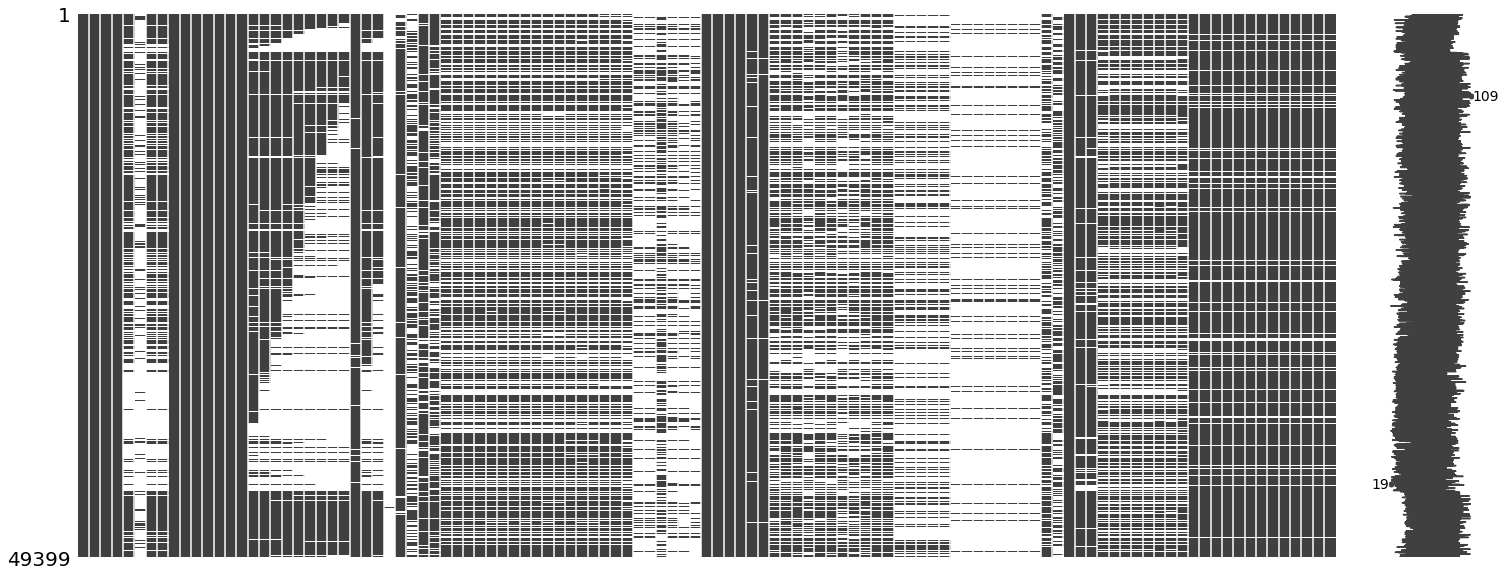

In [8]:
import missingno as msno 
%matplotlib inline
msno.matrix(book) 


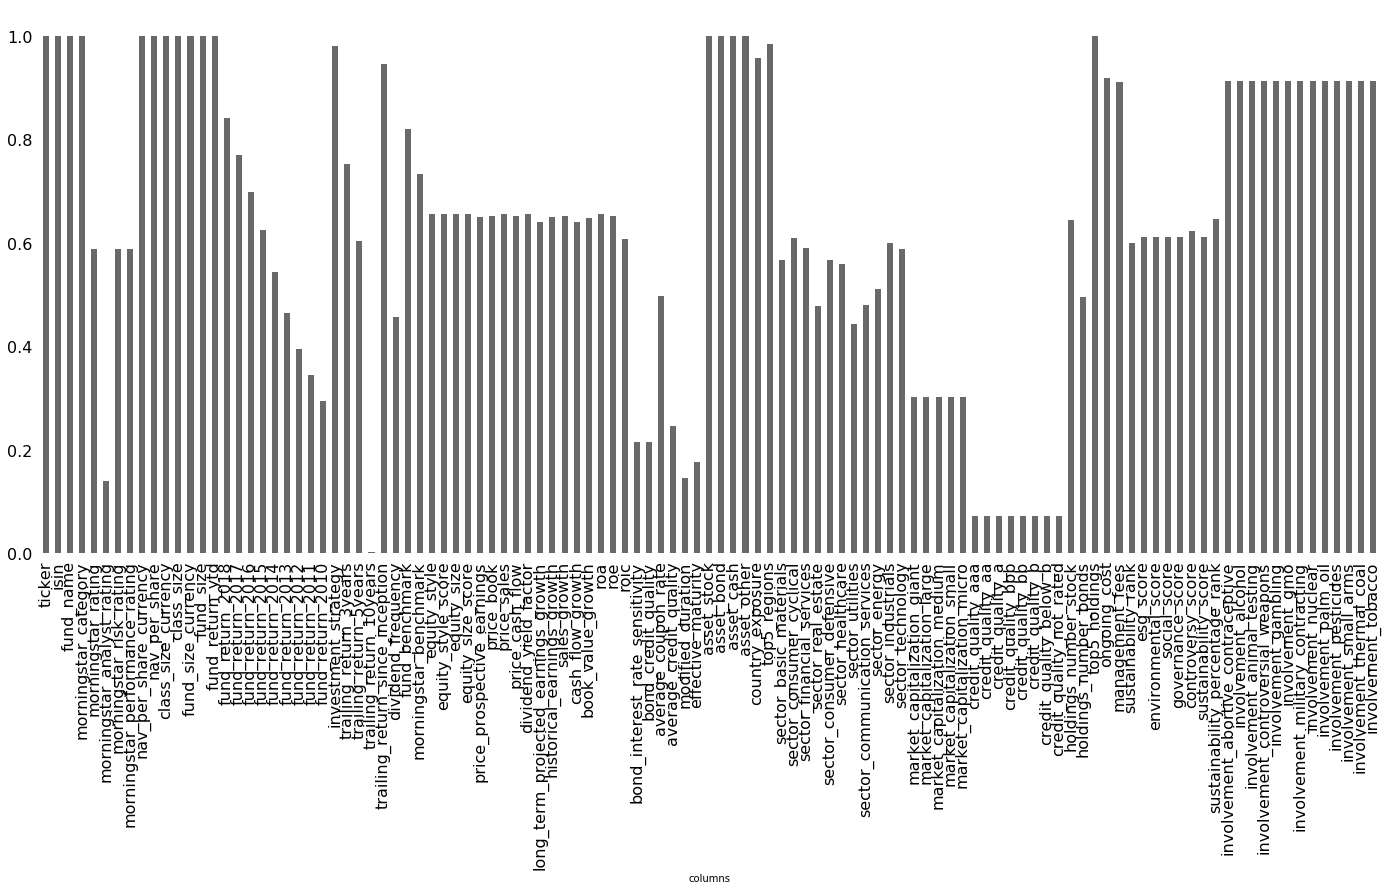

In [21]:
ax = msno.bar(book)
ax.set_xlabel('columns')
ax.set_xticks([x for x in range(len(book.columns))])

In [16]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49399 entries, 0 to 49398
Columns: 111 entries, ticker to involvement_tobacco
dtypes: float64(90), int64(2), object(19)
memory usage: 41.8+ MB


A careful look at the available columns and the data they contain motivates us to reduce the columns to the following dataset. The primary reason for this filter is to get rid of columns which are not useful in answering the questions we want to answer (see the first markdown box for our aim)

In [43]:
useful_columns = ['isin', 'fund_name', 'morningstar_category','morningstar_rating', 'morningstar_risk_rating', 'morningstar_performance_rating',
                  'fund_size_currency', 'fund_size','fund_return_ytd','fund_return_2018','fund_return_2017','fund_return_2016','fund_return_2015',
                  'fund_return_2014','fund_return_2013','fund_return_2012','fund_return_2011','fund_return_2010', 'trailing_return_3years', 
                  'trailing_return_5years', 'trailing_return_since_inception', 'dividend_frequency','fund_benchmark','morningstar_benchmark',
                  'dividend_yield_factor','long_term_projected_earnings_growth','historical_earnings_growth','asset_stock','asset_bond',
                  'asset_cash','asset_other','country_exposure', 'top5_regions','sector_basic_materials','sector_consumer_cyclical',
                  'sector_financial_services','sector_real_estate','sector_consumer_defensive','sector_healthcare','sector_utilities',
                  'sector_communication_services','sector_energy','sector_industrials','sector_technology','market_capitalization_giant',
                  'market_capitalization_large','market_capitalization_medium','market_capitalization_small','market_capitalization_micro',
                  'holdings_number_stock', 'holdings_number_bonds', 'ongoing_cost','management_fees'
]

Lets have a look at the data at our disposal in the useful columns we list above

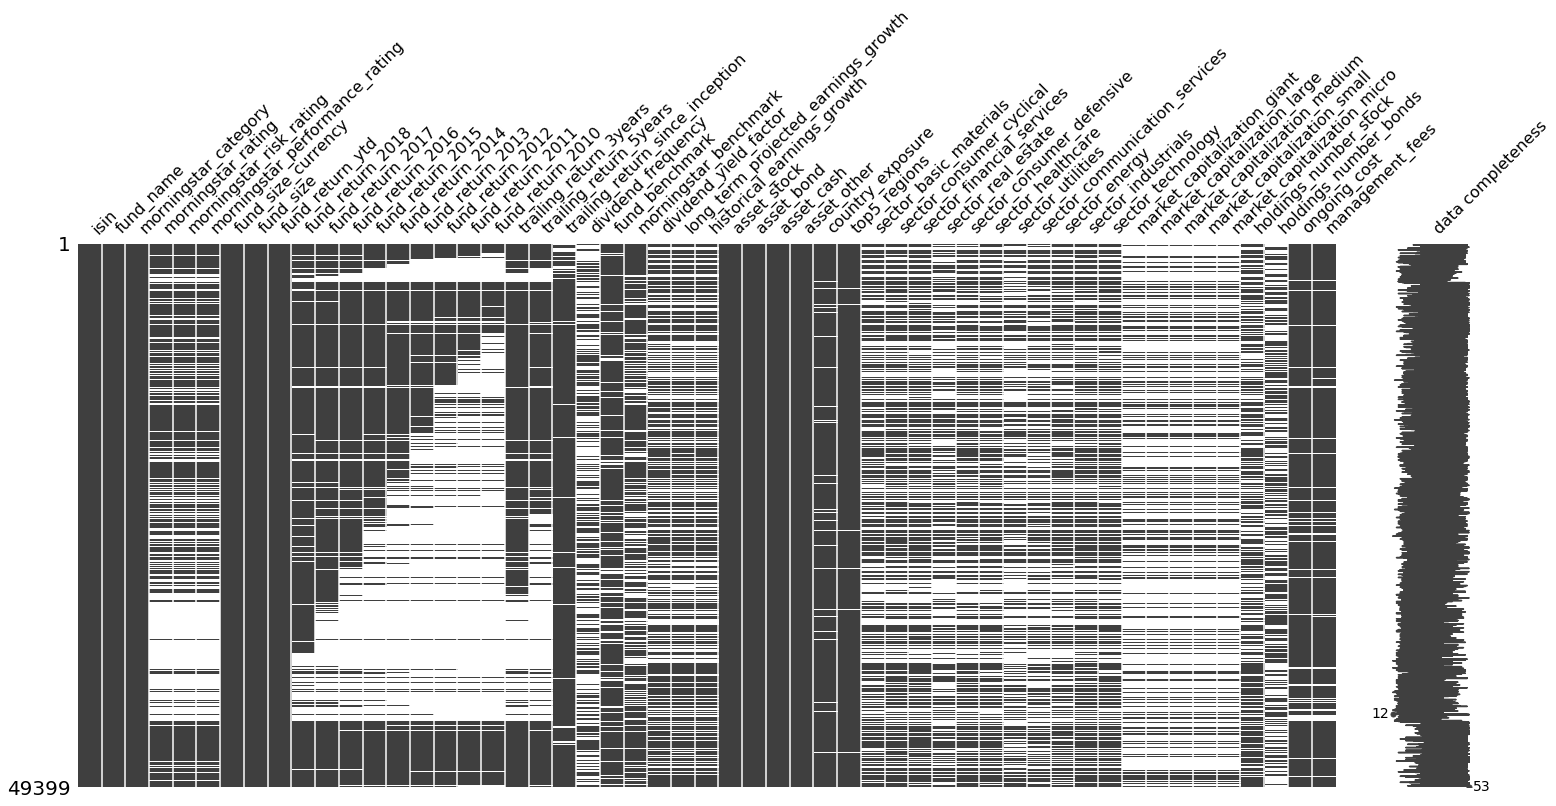

In [51]:
ax = msno.matrix(book[useful_columns], labels = True) 

Obervation from the excel file:
1. the columns **sector_basic_materials** to **holding_number_bonds** has a blank cell when there is no holding. So we should replace the **null** values in those columns with **0**
2. Some funds do not have a value for **management_fees** and **ongoing_cost**. Our primary aim is to measure the impact of fee on performance, so we will drop those rows if they account for a small number of funds

In [73]:
useful_book = book[useful_columns]

In [74]:
useful_book.loc[:,'sector_basic_materials':'holdings_number_bonds'] = useful_book.loc[:, 'sector_basic_materials':'holdings_number_bonds'].fillna(0)

C:\Users\sapoorv\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


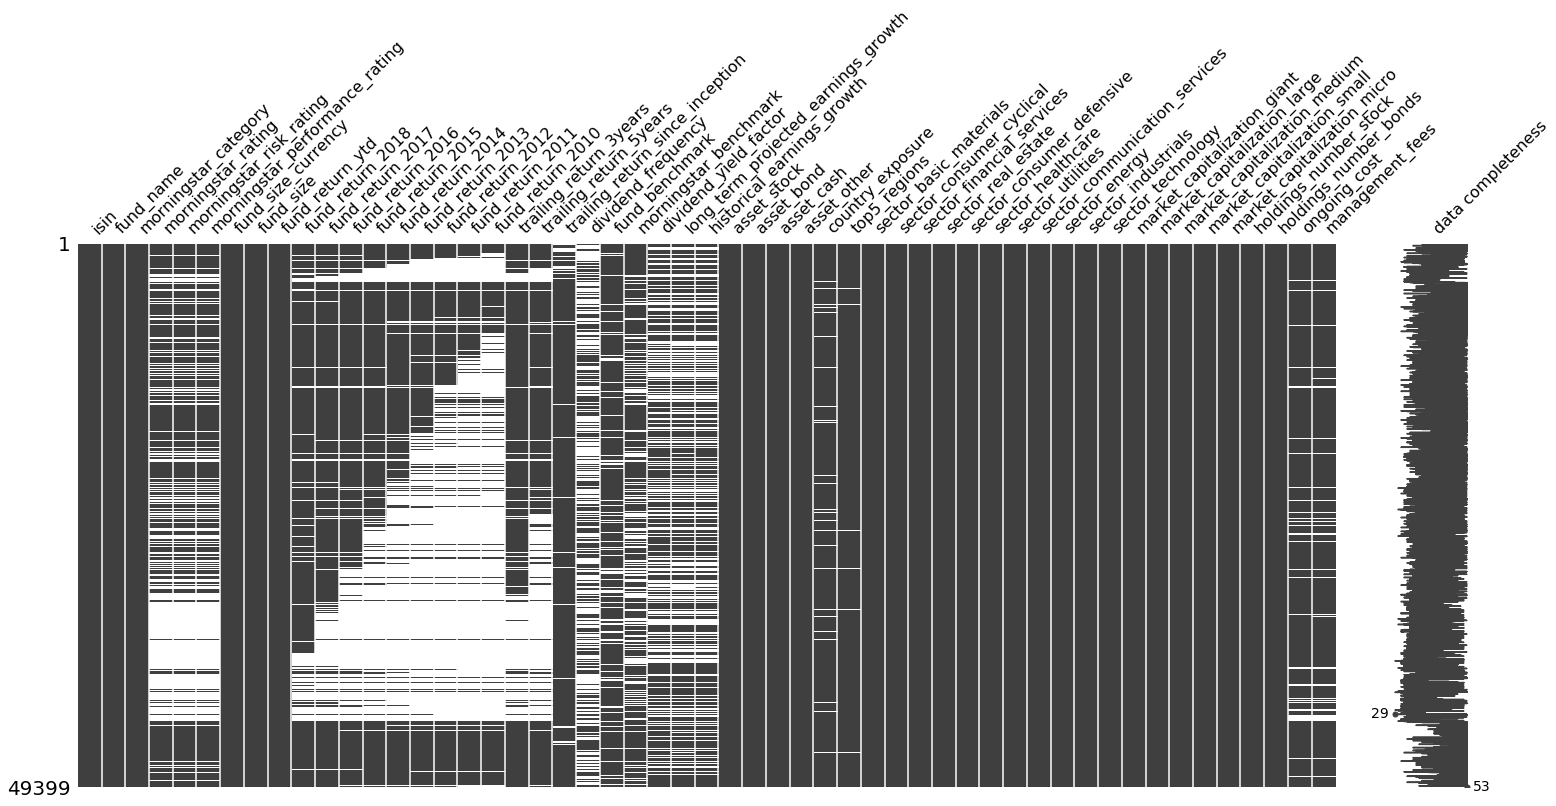

In [75]:
ax = msno.matrix(useful_book, labels = True) 

In [89]:
import numpy as np
useful_book = useful_book.groupby('isin').agg(np.mean)
useful_book.reset_index(inplace=True)

In [96]:
useful_book = useful_book[useful_book['management_fees'].notnull()]
useful_book = useful_book[useful_book['ongoing_cost'].notnull()]

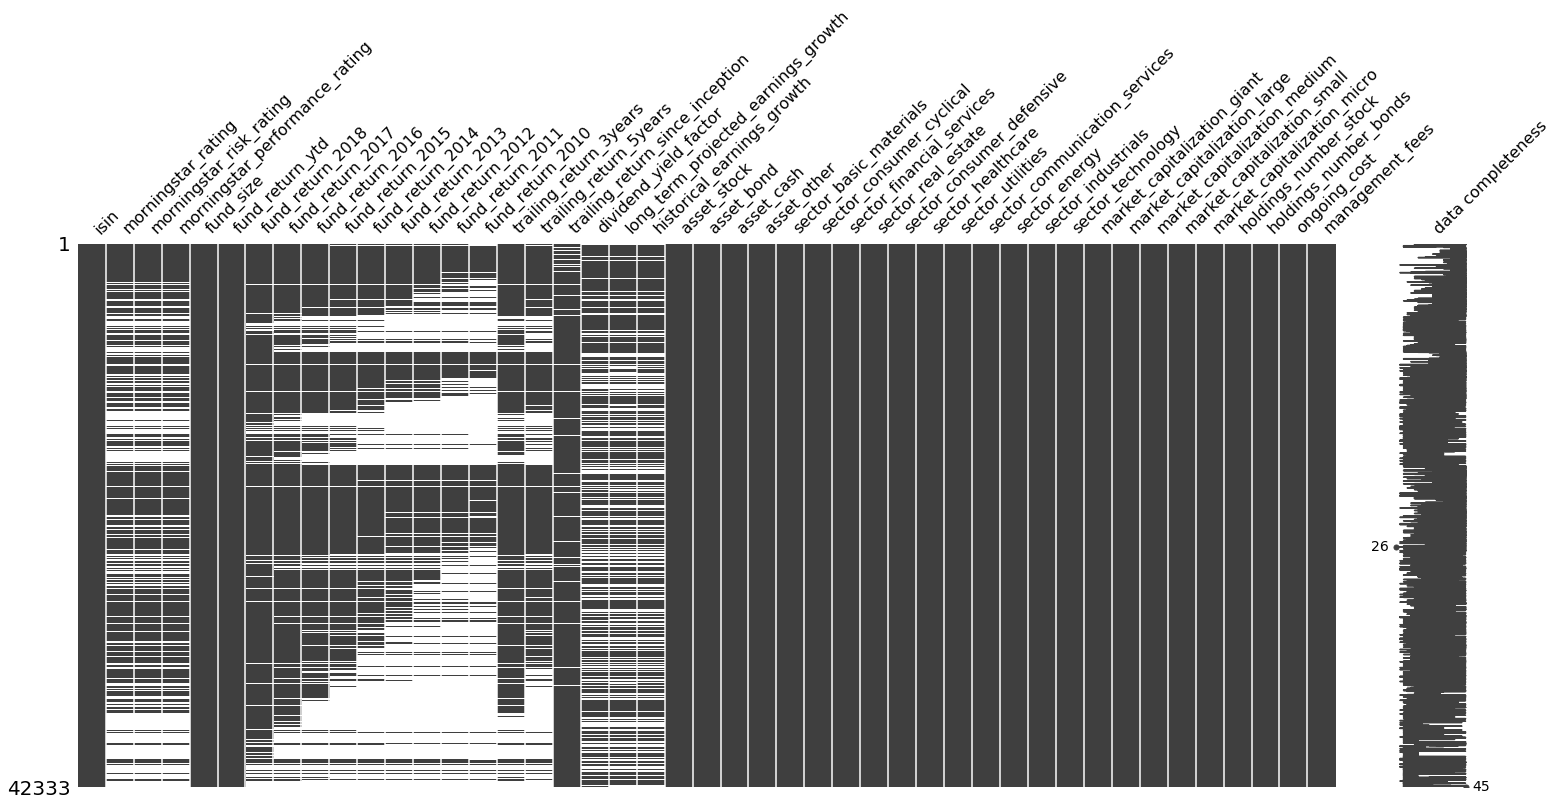

In [97]:
ax = msno.matrix(useful_book, labels = True) 